# Dynamic System Modelling for Blood Cell Production:
A dynamical system is a mathematical model that describes how a quantity changes over time, often based on rules like differential equations or difference equations.It defines how a system's state evolves over time from given initial conditions.

### Objective:
The objective of modeling RBC production and regulation using a dynamical system like **Mackey-Glass model** is to understand and predict how the concentration of RBCs (or their precursors) changes over time in response to **natural production, feedback, and removal processes**.

$$
f(x) = \frac{\theta^m \cdot b x}{\theta^m + x^m} - c x
$$

Where:

x: Concentration of red blood cells (RBCs) at time t.
It's the current state of the system.

θ (theta): A threshold/saturation parameter.Controls the RBC level at which production starts to saturate.
Smaller θ → earlier saturation. Determines how much RBC(x) is needed to start significantly slowing down production.

m: Controls nonlinearity — how sharp the transition is from low to saturated production.
Higher m → more switch-like or steeper response.

b: Maximum production rate — how fast RBCs can be produced when demand is high.The parameter b represents the maximum production rate of red blood cells (RBCs). It scales the overall output of the feedback function. 𝑏 is how strongly the body can produce RBCs when RBC levels are low.

c: Clearance or decay rate — how quickly RBCs are removed or die naturally.

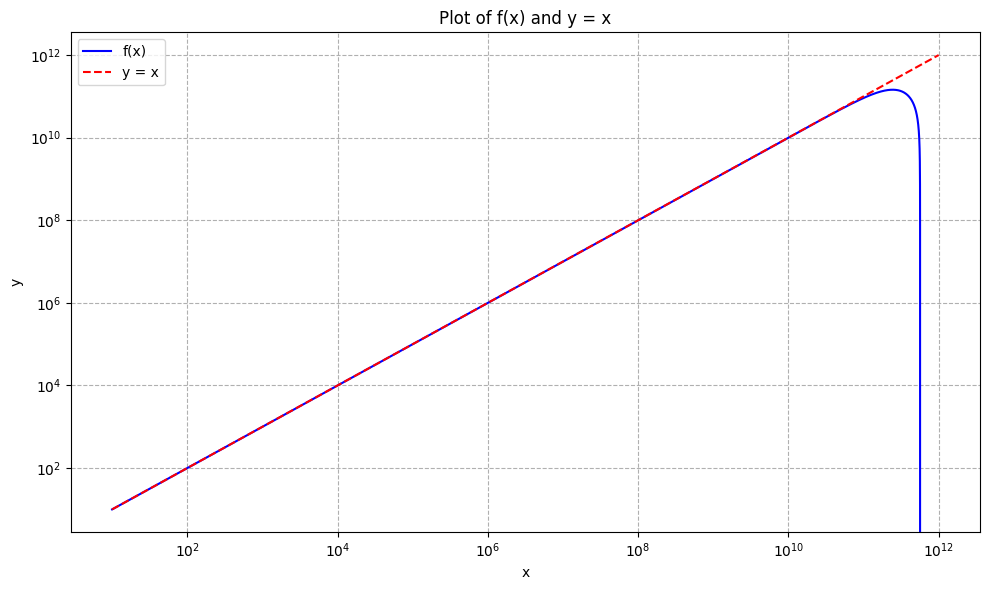

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t = 4 * 10**11
c = 0.5
b = 1.5
m = 2

# Define a suitable range for x
x = np.linspace(1e1, 1e12, 1000)

# Compute the function f(x)
f = -c * x + (b * t**m * x) / (t**m + x**m)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, f, label='f(x)', color='blue')
plt.plot(x, x, label='y = x', color='red', linestyle='--')  # y = x line
plt.title('Plot of f(x) and y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.xscale('log')  # Use log scale for x
plt.yscale('log')  # Use log scale for y to keep y = x line straight
plt.tight_layout()
plt.show()


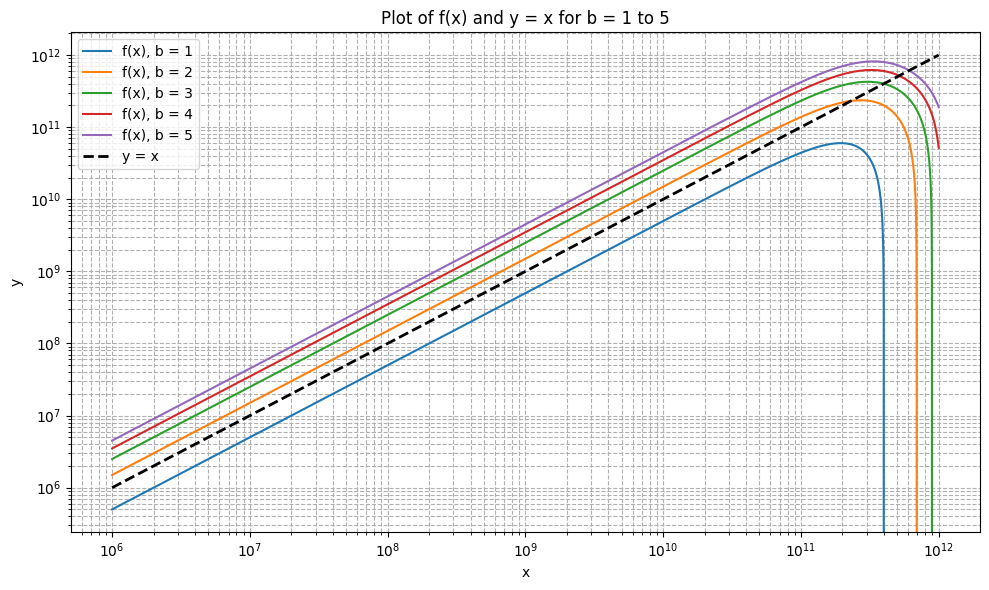

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t = 4 * 10**11
c = 0.5
m = 2

# Define a suitable range for x
x = np.linspace(1e6, 1e12, 1000)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Plot f(x) for b = 1 to 5
for b in range(1, 6):
    f = -c * x + (b * t**m * x) / (t**m + x**m)
    plt.plot(x, f, label=f'f(x), b = {b}')

# Plot the reference line y = x
plt.plot(x, x, label='y = x', color='black', linestyle='--', linewidth=2)

# Format the plot
plt.title('Plot of f(x) and y = x for b = 1 to 5')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


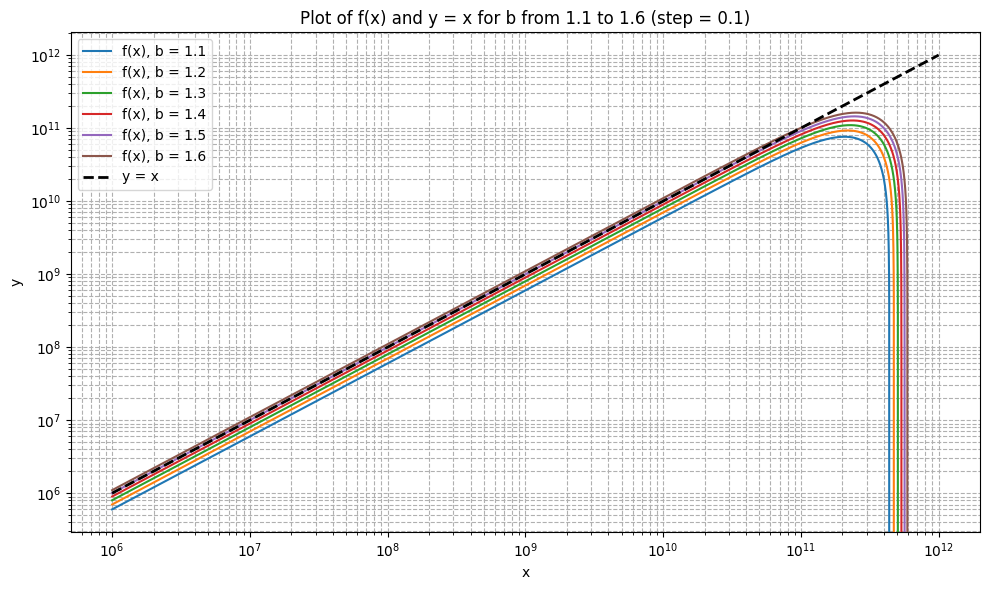

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
t = 4 * 10**11
c = 0.5
m = 2

# Define x range
x = np.linspace(1e6, 1e12, 1000)

# b values from 1.1 to 1.6 with step 0.1
b_values = np.arange(1.1, 1.7, 0.1)

# Prepare the plot
plt.figure(figsize=(10, 6))

# Plot f(x) for each b with label
for b in b_values:
    f = -c * x + (b * t**m * x) / (t**m + x**m)
    plt.plot(x, f, label=f'f(x), b = {b:.1f}')

# Plot y = x
plt.plot(x, x, label='y = x', color='black', linestyle='--', linewidth=2)

# Format the plot
plt.title('Plot of f(x) and y = x for b from 1.1 to 1.6 (step = 0.1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
b=1.25
c=0.2
for m in range(2,10):
   df= (m/b)*(1+c)**2 + m*(1+c)+1   
   #b=range(1+c,m/m-2)
   x=((b/(1+c))-1)**(1/m)     
plt.plot(x,df)

TypeError: 1.25 argument after * must be an iterable, not float

<Figure size 1000x600 with 0 Axes>

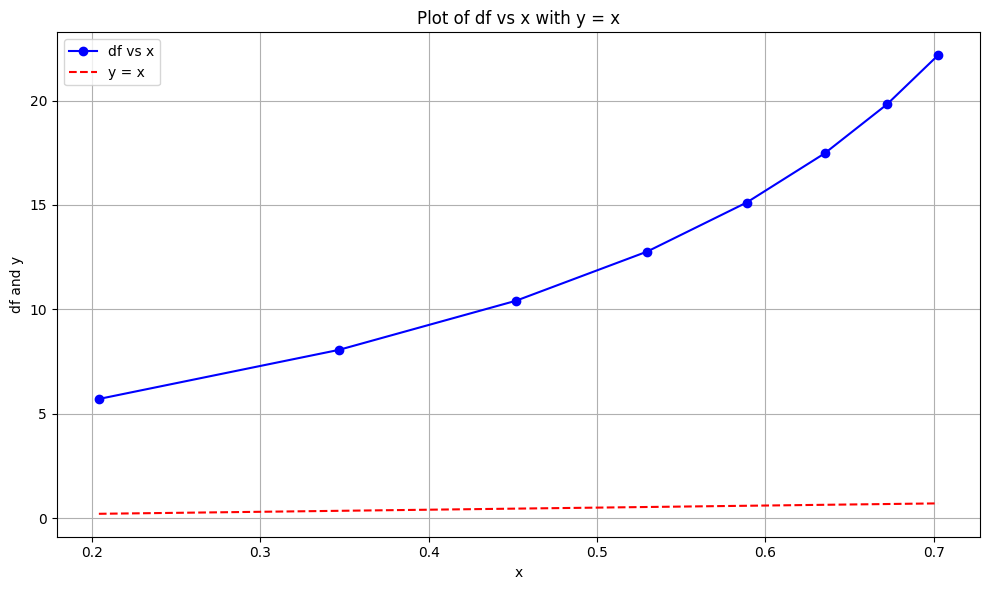

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
b = 1.25
c = 0.2

x_vals = []
df_vals = []

for m in range(2, 10):
    df = (m / b) * (1 + c)**2 + m * (1 + c) + 1
    x = ((b / (1 + c)) - 1)**(1 / m)

    x_vals.append(x)
    df_vals.append(df)

# Plot df vs x
plt.plot(x_vals, df_vals, marker='o', linestyle='-', color='blue', label='df vs x')

# Plot y = x line
plt.plot(x_vals, x_vals, linestyle='--', color='red', label='y = x')

plt.xlabel('x')
plt.ylabel('df and y')
plt.title('Plot of df vs x with y = x')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



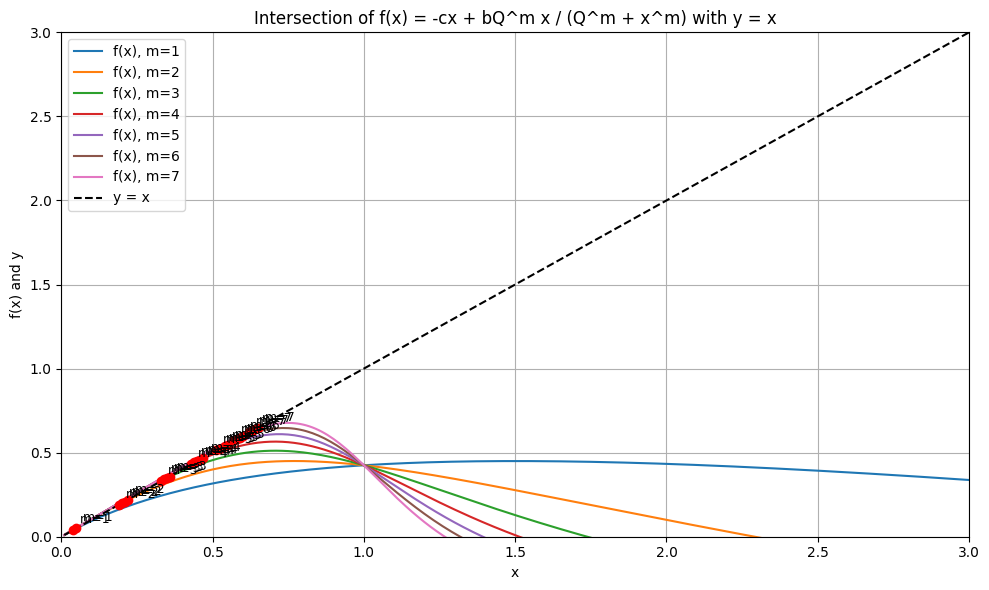

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b = 1.25
c = 0.2
Q = 1.0

# x values over a suitable domain
x_vals = np.linspace(0.01, 5, 500)

plt.figure(figsize=(10, 6))

intersections = []

# Try for different m values
for m in range(1, 8):  # try m = 1 to 7
    fx_vals = -c * x_vals + (b * Q**m * x_vals) / (Q**m + x_vals**m)
    
    # Check where f(x) ~ x
    for x, fx in zip(x_vals, fx_vals):
        if np.isclose(fx, x, rtol=0.01):  # 1% relative tolerance
            intersections.append((x, fx, m))
    
    # Plot f(x)
    plt.plot(x_vals, fx_vals, label=f'f(x), m={m}')

# Plot y = x
plt.plot(x_vals, x_vals, 'k--', label='y = x')

# Mark intersections
for x_i, fx_i, m_i in intersections:
    plt.plot(x_i, fx_i, 'ro')
    plt.annotate(f"m={m_i}", (x_i, fx_i), textcoords="offset points", xytext=(5, 5), fontsize=9)

# Axis limits adjusted to show intersection area
plt.xlim(0, 3)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('f(x) and y')
plt.title('Intersection of f(x) = -cx + bQ^m x / (Q^m + x^m) with y = x')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:

import numpy as np

# Parameters
theta = 1         
c = 0.5       
m = 1

# Generate b values from (1 + c) to (8 / m) with step 0.1
b_values = np.arange(1 + c, 8 / m +2, 0.5)
print("   fd_values\t\tb_values")
for b in b_values:
    x0 = theta * ((b / (1 + c)) - 1)**(1 / m)
    fd = (m / b) * c**2 + c * ((2 * m / b) - m) + (m / b) - m + 1
    print(f"  f'(x) = {fd:.4f},\t b={b}")

   fd_values		b_values
  f'(x) = 1.0000,	 b=1.5
  f'(x) = 0.6250,	 b=2.0
  f'(x) = 0.4000,	 b=2.5
  f'(x) = 0.2500,	 b=3.0
  f'(x) = 0.1429,	 b=3.5
  f'(x) = 0.0625,	 b=4.0
  f'(x) = 0.0000,	 b=4.5
  f'(x) = -0.0500,	 b=5.0
  f'(x) = -0.0909,	 b=5.5
  f'(x) = -0.1250,	 b=6.0
  f'(x) = -0.1538,	 b=6.5
  f'(x) = -0.1786,	 b=7.0
  f'(x) = -0.2000,	 b=7.5
  f'(x) = -0.2188,	 b=8.0
  f'(x) = -0.2353,	 b=8.5
  f'(x) = -0.2500,	 b=9.0
  f'(x) = -0.2632,	 b=9.5


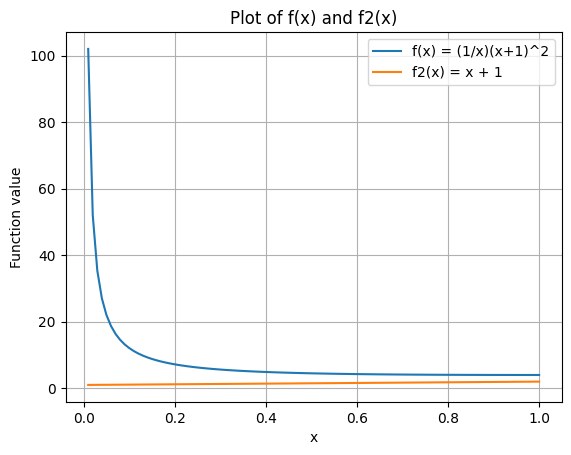

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values, avoiding division by zero
x_v = np.linspace(0.01, 1, 100)  # Avoid x=0 to prevent 1/x error

# Define functions using NumPy vector operations
f = (1 / x_v) * (x_v + 1)**2
f2 = x_v + 1

# Plot both functions
plt.plot(x_v, f, label='f(x) = (1/x)(x+1)^2')
plt.plot(x_v, f2, label='f2(x) = x + 1')

# Formatting
plt.title('Plot of f(x) and f2(x)')
plt.xlabel('x')
plt.ylabel('Function value')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
from sympy import symbols, simplify

# Define symbol
x = symbols('x')

# Define f(x)
f = (x**2 + 1) / (2*x + 3)

# Compose f(f(x))
f_folded = f.subs(x, f)

# Simplify the expression
simplified = simplify(f_folded)
print("f(f(x)) =", simplified)

f(f(x)) = ((2*x + 3)**2 + (x**2 + 1)**2)/((2*x + 3)*(2*x**2 + 6*x + 11))


y= -0.5*x + 9.5*x/(x + 1)


In [100]:
def f(x,m,b,c):
    
    return (b*x/(1+x**m)- c*x)

x=symbols('x')
m=symbols('m')
b=symbols('b')
c=symbols('c')
z=b*x/(1+x**m)- c*x
y=f(z,2,5,c)
print("y=",simplify(y))

#g=(y-x)/x(x-(b/(1+c)-1))
#print(g)

y= x*(b - c*(x**m + 1))*(-c*(x**2*(b - c*(x**m + 1))**2 + (x**m + 1)**2) + 5*(x**m + 1)**2)/((x**m + 1)*(x**2*(b - c*(x**m + 1))**2 + (x**m + 1)**2))


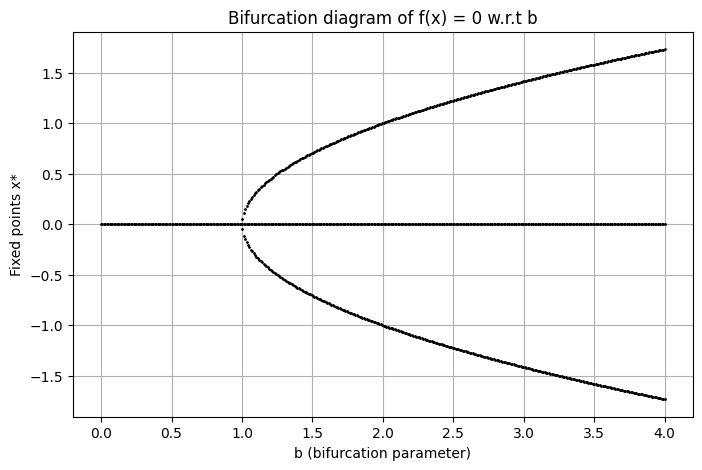

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, lambdify, diff

# Define symbolic variables
x, b = symbols('x b')
theta = 1
c = 1
m = 2

# Define f(x) with m=2
f_expr = (theta**2 * b * x) / (theta**2 + x**2) - c * x

# Solve f(x) = 0 for a range of b values
b_vals = np.linspace(0, 4, 400)
fixed_points = []

# Convert symbolic expression to numerical function
for b_val in b_vals:
    eq = Eq(f_expr.subs(b, b_val), 0)
    roots = solve(eq, x)
    # Filter real roots only
    real_roots = [r.evalf() for r in roots if r.is_real]
    fixed_points.append(real_roots)

# Plot bifurcation diagram
plt.figure(figsize=(8, 5))
for i, b_val in enumerate(b_vals):
    for root in fixed_points[i]:
        plt.plot(b_val, root, 'k.', markersize=2)

plt.title("Bifurcation diagram of f(x) = 0 w.r.t b")
plt.xlabel("b (bifurcation parameter)")
plt.ylabel("Fixed points x*")
plt.grid(True)
plt.show()


# Dynamic System of Blood Cell Production:
A dynamical system is a mathematical model that describes how a quantity changes over time, often based on rules like differential equations or difference equations.It defines how a system's state evolves over time from given initial conditions.

### Objective:
The objective of modeling RBC production and regulation using a dynamical system like **Mackey-Glass model** is to understand and predict how the concentration of RBCs (or their precursors) changes over time in response to **natural production, feedback, and removal processes**.

$$
f(x) = \frac{\theta^m \cdot b x}{\theta^m + x^m} - c x
$$

Where:

x: Concentration of red blood cells (RBCs) at time t.
It's the current state of the system.

θ (theta): A threshold/saturation parameter.Controls the RBC level at which production starts to saturate.
Smaller θ → earlier saturation. Determines how much RBC(x) is needed to start significantly slowing down production.

m: Controls nonlinearity — how sharp the transition is from low to saturated production.
Higher m → more switch-like or steeper response.

b: Maximum production rate — how fast RBCs can be produced when demand is high.The parameter b represents the maximum production rate of red blood cells (RBCs). It scales the overall output of the feedback function. 𝑏 is how strongly the body can produce RBCs when RBC levels are low.

c: Clearance or decay rate — how quickly RBCs are removed or die naturally.

In [ ]:
from sympy import symbols, simplify, solve

# Define symbols
x, b, c = symbols('x b c')

# Constants
m = 8

# Define z = b*x / (1 + x^m) - c*x
z = b*x / (1 + x**m) - c*x

# Define the function f
def f(x, m, b, c):
    return (b * x / (1 + x**m) - c * x)

# Compute y = f(z, 2, 5, c)
y = f(z, m, b, c)

# Solve y - x = 0
equation = y - x
solution = solve(equation, x)

# Print the simplified solutions
print("Solutions for y - x = 0:")
x=0
for sol in solution:
    print(f"x_{x}= ",simplify(sol))
    x=x+1



Solutions for y - x = 0:
x_0=  0
x_1=  -I*((b - c + 1)/(c - 1))**(1/4)
x_2=  I*((b - c + 1)/(c - 1))**(1/4)
x_3=  -I*(-(-b + c + 1)/(c + 1))**(1/4)
x_4=  I*((b - c - 1)/(c + 1))**(1/4)
x_5=  -((b - c + 1)/(c - 1))**(1/4)
x_6=  ((b - c + 1)/(c - 1))**(1/4)
x_7=  -(-(-b + c + 1)/(c + 1))**(1/4)
x_8=  ((b - c - 1)/(c + 1))**(1/4)


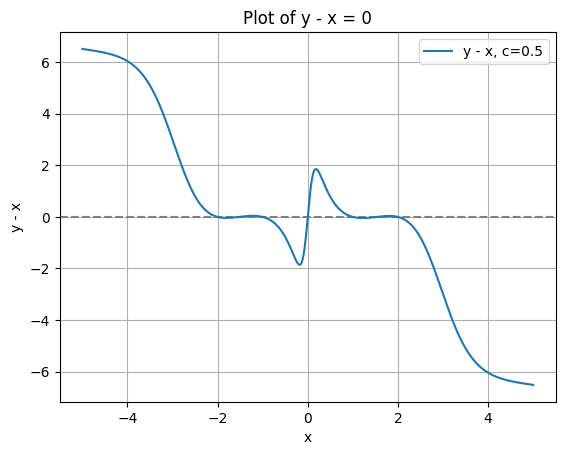

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

# Define symbols and function
x, c = symbols('x c')
m = 2
b = 5
z = b*x / (1 + x**m) - c*x
y = b*z / (1 + z**m) - c*z
f = y - x

# Turn into numerical function for plotting
f_num = lambdify((x, c), f, 'numpy')

# Set c in (0, 1)
c_val = 0.5  # example

# Evaluate f(x) for a range of x
x_vals = np.linspace(-5, 5, 1000)
y_vals = f_num(x_vals, c_val)

# Plot y - x = 0 curve
plt.axhline(0, color='gray', linestyle='--')
plt.plot(x_vals, y_vals, label=f'y - x, c={c_val}')
plt.title("Plot of y - x = 0")
plt.xlabel('x')
plt.ylabel('y - x')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify,diff,solve,sqrt

# Define symbols and function
x,c,b,m= symbols('x b c m')
m = 2
def f_x(x):
    fx = (b*x/(1 + x**m)) - c*x
    return fx

fd=diff(f_x(x),x)

print("f'(x) =",fd)
def fd(x):
    return -b - 2*c*x**2/(x**2 + 1)**2 + c/(x**2 + 1)

x1=  sqrt(2)*sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)/2
# x_3=  -sqrt(2)*sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)/2
x2=  sqrt(2)*sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)/2
fdx1=fd(x1)
fdx2=fd(x2)
print("simp_fdx1=",display(fdx1))
print("f'(x1) =",fdx1)
print("f'(x2) =",fdx2)

print(simplify(f_x(x1))==simplify(x2))

f'(x) = -b - 2*c*x**2/(x**2 + 1)**2 + c/(x**2 + 1)


b/(1 + (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2)) - c - (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(b*(1 + (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2))**2)

simp_fdx1= None
f'(x1) = b/(1 + (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2)) - c - (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(b*(1 + (-b**2 + b*c - sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2))**2)
f'(x2) = b/(1 + (-b**2 + b*c + sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2)) - c - (-b**2 + b*c + sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(b*(1 + (-b**2 + b*c + sqrt((-b**2 + b*c - 2*b - 1)*(-b**2 + b*c + 2*b - 1)) - 1)/(2*b**2))**2)
False


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, diff, solve, sqrt, simplify

# Define symbols
x, c, b = symbols('x c b')
m = 2

# Define the function f(x)
def f_x(x):
    return (b * x / (1 + x**2)) - c * x

# Compute symbolic derivative
fdx = diff(f_x(x), x)
print("f'(x) =", fdx)

# Optional: Turn f'(x) into a callable function if needed
# fd_func = lambdify((x, b, c), fdx, modules='sympy')

# Define critical points symbolically
x1 =  sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2
x2 =  sqrt(2) * sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Evaluate f'(x) at x1 and x2
fdx1 = fdx.subs(x, x1)
fdx2 = fdx.subs(x, x2)

y=fdx1*fdx2

print("f'(x1) =", fdx1)
print("f'(x2) =", fdx2)

# Optional: compare symbolic values (if meaningful)
# This comparison doesn't make sense as is; x1 and x2 are values of x, f(x1) is function output
# But if you want to check f(x1) == f(x2), you can do:
print(f_x(x2)==x1)




f'(x) = -2*b*x**2/(x**2 + 1)**2 + b/(x**2 + 1) - c
f'(x1) = b/(1 + (b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2)) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2))**2) - c
f'(x2) = b/(1 + (b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2)) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2))**2) - c
False


In [15]:
simplify(f_x(x1))


sqrt(2)*c*sqrt((b*c - c**2 - sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)*(b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) + 1)/(2*(b*c + c**2 - sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1))

In [5]:
f_x(x).evalf(subs={b: 5, c: 0.5})


-0.5*x + 5.0*x/(x**2 + 1.0)

In [7]:
f_x(x1).evalf(subs={b: 5, c: 0.5})

2.00000000000000

In [ ]:
f_x(x2).evalf(subs={b: 5, c: 0.5})=x1

1.00000000000000

In [11]:
x1 .evalf(subs={b: 5, c: 0.5})

1.00000000000000

In [12]:
x2.evalf(subs={b: 5, c: 0.5})

2.00000000000000

In [10]:
f_x(2).evalf(subs={b: 5, c: 0.5})

1.00000000000000

In [6]:
fdx .evalf(subs={b: 5, c: 0.5})

-10.0*x**2/(x**2 + 1.0)**2 - 0.5 + 5.0/(x**2 + 1.0)

<lambdifygenerated-34>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)


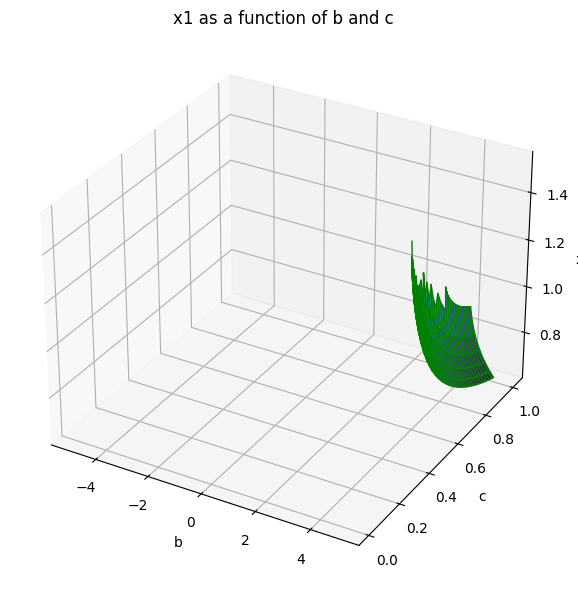

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# Define the function f(x)
f_x = (b * x / (1 + x**2)) - c * x

# Define x1 as a function of b and c
x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = x1

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(-5, 5, 200)
c_vals = np.linspace(0.01, 1, 200)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='green')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('x1')
ax.set_title("x1 as a function of b and c")

plt.tight_layout()
plt.show()


<lambdifygenerated-33>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*b*sqrt((b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - 1/2*sqrt(2)*c*sqrt((b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)


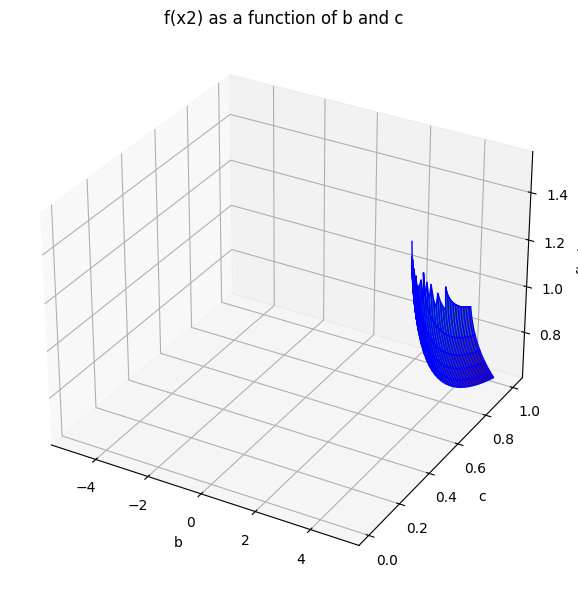

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# Define the function f(x)
f_x = (b * x / (1 + x**2)) - c * x

# Define x1 as a function of b and c
x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = f_x.subs(x,x2)

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(-5, 5, 200)
c_vals = np.linspace(0.01, 1, 200)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='blue')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x₁)')
ax.set_title("f(x2) as a function of b and c")

plt.tight_layout()
plt.show()


<lambdifygenerated-30>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)


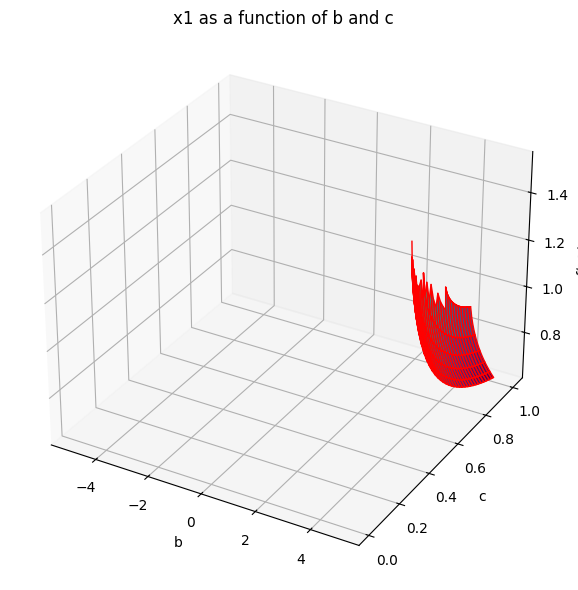

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# Define the function f(x)
f_x = (b * x / (1 + x**2)) - c * x

# Define x1 as a function of b and c
x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = x1

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(-5, 5, 200)
c_vals = np.linspace(0.01, 1, 200)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='red')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x2)')
ax.set_title("x1 as a function of b and c")

plt.tight_layout()
plt.show()


<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*c*sqrt((b*c - c**2 - sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)*(b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) + 1)/(b*c + c**2 - sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)


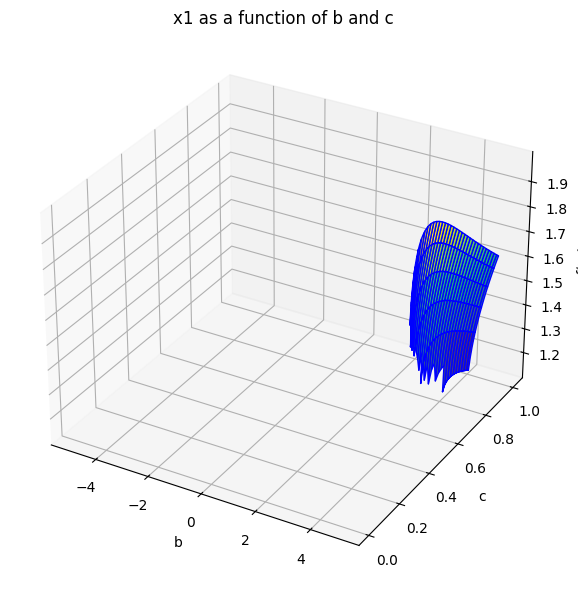

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# # Define the function f(x)
# f_x = (b * x / (1 + x**2)) - c * x

# # Define x1 as a function of b and c
# x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = simplify(f_x.subs(x, x1))

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(-5, 5, 200)
c_vals = np.linspace(0.01, 1, 200)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='blue')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x₁)')
ax.set_title("x1 as a function of b and c")

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, diff, solve, sqrt, simplify

# Define symbols
x, c, b = symbols('x c b')
m = 2

# Define the function f(x)
def f_x(x):
    return (b * x / (1 + x**2)) - c * x

# Compute symbolic derivative
fdx = diff(f_x(x), x)
print("f'(x) =", fdx)

# Optional: Turn f'(x) into a callable function if needed
# fd_func = lambdify((x, b, c), fdx, modules='sympy')

# Define critical points symbolically
x1 =  sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2
x2 =  sqrt(2) * sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Evaluate f'(x) at x1 and x2
fdx1 = fdx.subs(x, x1)
fdx2 = fdx.subs(x, x2)

y=fdx1*fdx2
display(y)





f'(x) = -2*b*x**2/(x**2 + 1)**2 + b/(x**2 + 1) - c


(b/(1 + (b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2)) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2))**2) - c)*(b/(1 + (b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2)) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(2*c**2))**2) - c)

<lambdifygenerated-14>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)


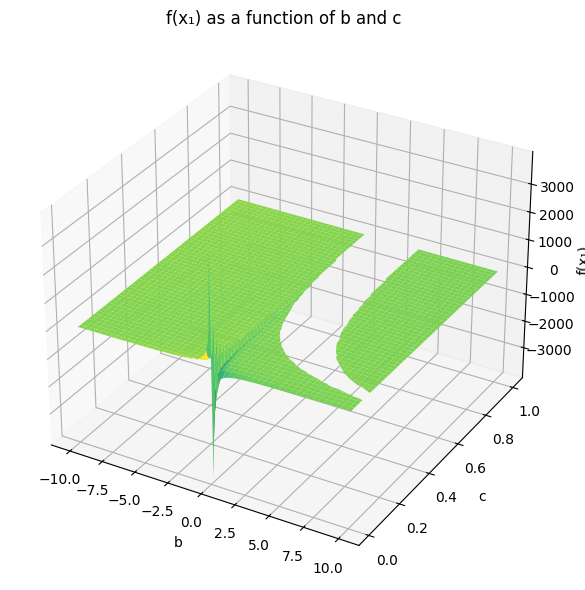

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# # Define the function f(x)
# f_x = (b * x / (1 + x**2)) - c * x

# # Define x1 as a function of b and c
# x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = y

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(-10, 10, 200)
c_vals = np.linspace(0.01, 1, 200)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x₁)')
ax.set_title("f(x₁) as a function of b and c")

plt.tight_layout()
plt.show()


<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in divide
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c*

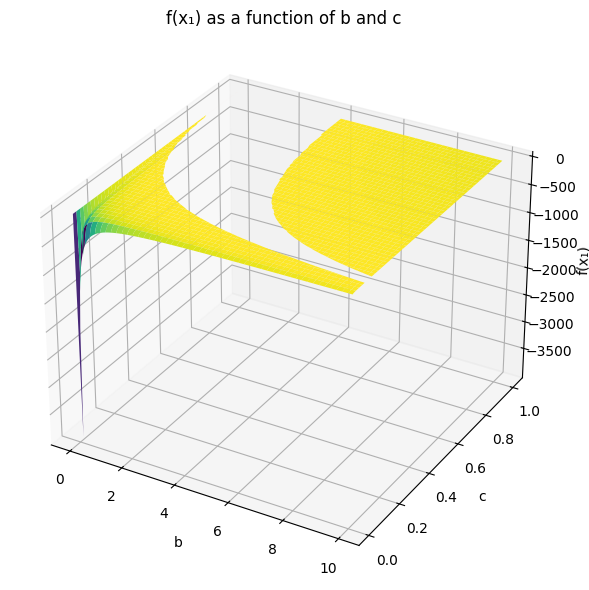

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, lambdify, simplify

# Define symbols
x, b, c = symbols('x b c')

# # Define the function f(x)
# f_x = (b * x / (1 + x**2)) - c * x

# # Define x1 as a function of b and c
# x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Compute f(x1)
f_x1 = y

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(0, 10, 200)
c_vals = np.linspace(0.01, 1, 2000)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x₁)')
ax.set_title("f(x₁) as a function of b and c")

plt.tight_layout()
plt.show()


f'(x) = -2*b*x**2/(x**2 + 1)**2 + b/(x**2 + 1) - c


<lambdifygenerated-22>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)
<lambdifygenerated-22>:2: RuntimeWarning: invalid value encountered in divide
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - 

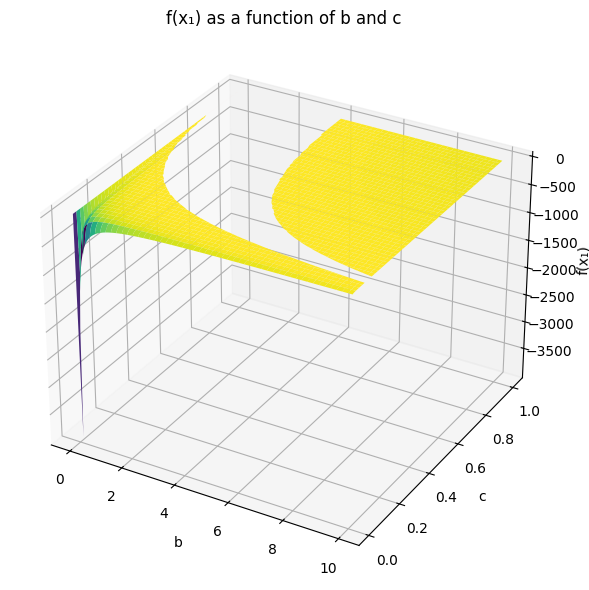

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, diff, solve, sqrt, simplify

# Define symbols
x, c, b = symbols('x c b')
m = 2

# Define the function f(x)
def f_x(x):
    return (b * x / (1 + x**2)) - c * x

# Compute symbolic derivative
fdx = diff(f_x(x), x)
print("f'(x) =", fdx)

# Optional: Turn f'(x) into a callable function if needed
# fd_func = lambdify((x, b, c), fdx, modules='sympy')

# Define critical points symbolically
x1 =  sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2
x2 =  sqrt(2) * sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Evaluate f'(x) at x1 and x2
fdx1 = fdx.subs(x, x1)
fdx2 = fdx.subs(x, x2)

y=fdx1*fdx2

f_x1 = y

# Create a numerical version of f(x1)
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(0, 10, 200)
c_vals = np.linspace(0.01, 1, 2000)  # Avoid division by zero

# Create meshgrid for plotting
B, C = np.meshgrid(b_vals, c_vals)

# Compute f(x1) over the grid
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error in computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel('f(x₁)')
ax.set_title("f(x₁) as a function of b and c")

plt.tight_layout()
plt.show()


<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)
<lambdifygenerated-19>:2: RuntimeWarning: invalid value encountered in divide
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - 

Max value of f'(x₁) * f'(x₂): 0.9998 at b = 9.8995, c = 0.0846


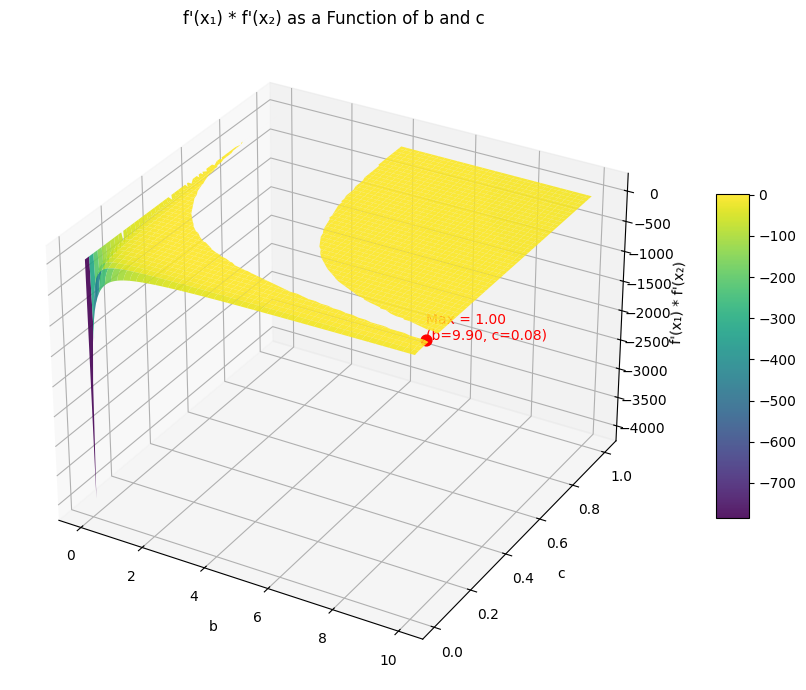

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, diff, lambdify

# Define symbols
x, c, b = symbols('x c b')
m = 2

# Define the function f(x)
def f_x(x):
    return (b * x / (1 + x**2)) - c * x

# Compute symbolic derivative
fdx = diff(f_x(x), x)

# Define critical points symbolically
x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2
x2 = sqrt(2) * sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Evaluate f'(x) at x1 and x2
fdx1 = fdx.subs(x, x1)
fdx2 = fdx.subs(x, x2)
f_x1 = fdx1 * fdx2

# Lambdify the expression
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(0, 10, 200)
c_vals = np.linspace(0.01, 1, 200)
B, C = np.meshgrid(b_vals, c_vals)

# Compute the Z surface
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Find max value and corresponding b, c
Z_masked = np.ma.masked_invalid(Z)
max_idx = np.unravel_index(np.nanargmax(Z_masked), Z.shape)
b_max, c_max, z_max = B[max_idx], C[max_idx], Z[max_idx]

# Print max coordinates
print(f"Max value of f'(x₁) * f'(x₂): {z_max:.4f} at b = {b_max:.4f}, c = {c_max:.4f}")

# Plotting
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Plot max point
ax.scatter(b_max, c_max, z_max, color='red', s=60)
ax.text(b_max, c_max, z_max,
        f'Max = {z_max:.2f}\n(b={b_max:.2f}, c={c_max:.2f})',
        color='red', fontsize=10)

# Labels
ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel("f'(x₁) * f'(x₂)")
ax.set_title("f'(x₁) * f'(x₂) as a Function of b and c")

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()


<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in sqrt
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 + sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)
<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in divide
  return (b/(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) - b*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/(c**2*(1 + (1/2)*(b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2)**2) - c)*(b/(1 + (1/2)*(b*c - 

🔴 Max Z < 0: 0.0001 at b = 0.0000, c = 0.0100
🟢 Min Z ≥ 0: 0.0001 at b = 0.0000, c = 0.0100


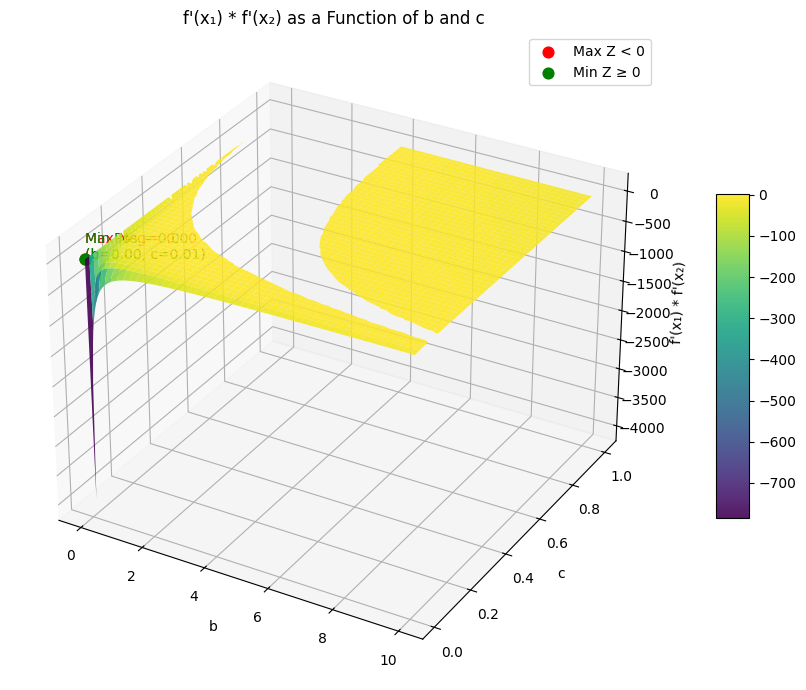

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sqrt, diff, lambdify

# Define symbols
x, c, b = symbols('x c b')
m = 2

# Define the function f(x)
def f_x(x):
    return (b * x / (1 + x**2)) - c * x

# Compute symbolic derivative
fdx = diff(f_x(x), x)

# Define critical points symbolically
x1 = sqrt(2) * sqrt((b*c - c**2 - sqrt((b*c - c**2 - 2*c - 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2
x2 = sqrt(2) * sqrt((b*c - c**2 + sqrt(-(-b*c + c**2 + 2*c + 1)*(b*c - c**2 + 2*c - 1)) - 1)/c**2) / 2

# Evaluate f'(x) at x1 and x2
fdx1 = fdx.subs(x, x1)
fdx2 = fdx.subs(x, x2)
f_x1 = fdx1 * fdx2

# Lambdify the expression
f_x1_func = lambdify((b, c), f_x1, modules='numpy')

# Generate b and c values
b_vals = np.linspace(0, 10, 200)
c_vals = np.linspace(0.01, 1, 200)
B, C = np.meshgrid(b_vals, c_vals)

# Compute the Z surface
try:
    Z = f_x1_func(B, C)
except Exception as e:
    print("Error computing f(x1):", e)
    Z = np.full_like(B, np.nan)

# Mask invalid values
Z_masked = np.ma.masked_invalid(Z)

# Region where Z < 0 (negative values)
neg_mask = (Z_masked < 0)
if np.any(neg_mask):
    max_neg_idx = np.unravel_index(np.nanargmax(Z_masked * neg_mask), Z.shape)
    b_neg, c_neg, z_neg = B[max_neg_idx], C[max_neg_idx], Z[max_neg_idx]
    print(f"🔴 Max Z < 0: {z_neg:.4f} at b = {b_neg:.4f}, c = {c_neg:.4f}")
else:
    b_neg = c_neg = z_neg = None
    print("No Z < 0 values found.")

# Region where Z >= 0 (positive or zero)
pos_mask = (Z_masked >= 0)
if np.any(pos_mask):
    min_pos_idx = np.unravel_index(np.nanargmin(Z_masked + (~pos_mask)*1e10), Z.shape)
    b_pos, c_pos, z_pos = B[min_pos_idx], C[min_pos_idx], Z[min_pos_idx]
    print(f"🟢 Min Z ≥ 0: {z_pos:.4f} at b = {b_pos:.4f}, c = {c_pos:.4f}")
else:
    b_pos = c_pos = z_pos = None
    print("No Z ≥ 0 values found.")

# Plotting
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(B, C, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Plot max Z < 0 in red
if z_neg is not None:
    ax.scatter(b_neg, c_neg, z_neg, color='red', s=60, label="Max Z < 0")
    ax.text(b_neg, c_neg, z_neg,
            f'Max Neg = {z_neg:.2f}\n(b={b_neg:.2f}, c={c_neg:.2f})',
            color='red', fontsize=10)

# Plot min Z ≥ 0 in green
if z_pos is not None:
    ax.scatter(b_pos, c_pos, z_pos, color='green', s=60, label="Min Z ≥ 0")
    ax.text(b_pos, c_pos, z_pos,
            f'Min Pos = {z_pos:.2f}\n(b={b_pos:.2f}, c={c_pos:.2f})',
            color='green', fontsize=10)

# Labels and color bar
ax.set_xlabel('b')
ax.set_ylabel('c')
ax.set_zlabel("f'(x₁) * f'(x₂)")
ax.set_title("f'(x₁) * f'(x₂) as a Function of b and c")
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()
